# SVM for classification
Can be thought of as fitting the largest possible street.\
![title](../images/SVM1.png)

The decision function is of the form,
$$y^{(i)}\theta^TX^{(i)}$$
$$y^{(i)} = 1,\ if\ positive\ class$$
$$y^{(i)} = 0,\ if\ negative\ class$$

Therefore the generalised equation will be,
$$t^{(i)}(w^TX^{(i)} + b) >= 1$$
$$t^{(i)} = -1, if\ y^{(i)} = 0$$
$$t^{(i)} = 1, if\ y^{(i)} = 1$$

from above equation, 
* If we reduce `w`, the range of `x` increases, therefore making the street wider. eg: if w = 0.5, x range will be -2 to 2 compared to 1 to 1 for w = 1.  
* Also, the above is for hard margins (witthout any error in classification). We need to perform soft margin clasffications always to avoid,
  * Model being sensitive to outliers
  * Can be done only when the classification is linearly separable as if a data is present near the other class, it will become difficult to separate them using a linear decision boundary.
* To perform soft margin classfication, we add a `slack variable` that is $\zeta^{(i)} >= 0$, which is a measure of how much the ith instance is allowed to violate the margin.

Therefore SVM is a constrained optimisation problem with two objectives,
1. Minimise `w` to increase the street width.
2. Minimise `$\zeta$` to reduce the margin violation.

Consider the slope of `w`, that is ||w||. We need to minimise the weights using this equation. But in practise we use,
**$\frac{1}{2}||w||^2$** instead of ||w|| as it is has a simple derivative and will be derivable at w = 0.

$$\min \limits_{w, b} \frac{1}{2}w^Tw,\ for\ hard\ margin\ classification\ subject\ to\ t^{(i)}(w^TX^{(i)} + b) >= 1$$
$$\min \limits_{w, b} \frac{1}{2}w^Tw + C \sum^m \limits_{i=1} \zeta^{(i)},\ for\ soft\ margin\ classification\ subject\ to\ t^{(i)}(w^TX^{(i)} + b) >= 1 - \zeta^{(i)}$$
Therefore, 
* if C reduces, the street becomes wider as w value will reduce.
* But if we reduce C beyond a certain limit, it will end up underfitting the model

It can be solved using `hinge loss` or `squared hinge loss`

![title](../images/SVM4.png)

Squared hinge loss is preferred, as
* Squared hinge loss will be more sensitive to outliers
* Will have faster convergence for clean data

$$\ell(y) = \sum^m \limits_{i=1} \max(0, 1 - t \cdot (w^TX^{(i)} + b))^2$$

This equation is used in place of $\zeta$, therefore feature range is widened for features with more loss (by reducing their weights).

## Dual problem
The alternate way to solve this primal problem is to use `dual problem` which under certain conditions (met by SVM) will produce same solutions as the primal problem. Since it is a constrained optimisation problem, by `Lagrangian multiplier method` for equality constraint (can be applied to inquality constaint as well, since SVM meets certain conditions), the `Lagragian` or the `Lagrangian function` is given by,
$$C(w,b,\alpha) = optimisation\ function - \sum^{m} \limits_{i=1} constraint$$
$$C(w,b,\alpha) = \frac{1}{2}w^Tw - \sum^{m} \limits_{i=1} \alpha^{(i)}(t^{(i)}(w^Tx^{(i)} + b) - 1)$$

By lagrangian, there exists $\alpha$ where $(\hat{x}, \hat{y}, \hat{\alpha})$ which is stationary, that is its partial derivative will be 0. Therefore, by taking the partial derivative we will be able to compute the solutions for the constrained optimisation problem.

$$\nabla_w C = w - \sum^{m} \limits_{i=1} \alpha^{(i)}(t^{(i)}x^{(i)} = 0$$
$$\nabla_b C = - \sum^{m} \limits_{i=1} \alpha^{(i)}(t^{(i)} = 0$$

Substituting, in the above equation we will get
$$C(w,b,\alpha) = \frac{1}{2} \sum^{m} \limits_{i=1} \sum^{m} \limits_{j=1} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} x^{(i)} x^{(j)} - \sum^{m} \limits_{i=1} \alpha^{(i)}$$

Therefore, now the objective is to minimise $\alpha$ to compute the $\hat{\alpha}$ to compute $\hat{w}$ and $\hat{b}$ (Note: $\hat{b}$ is computed using the upport vector equation)

$$\hat{b} = \frac{1}{m} \sum^{m} \limits_{i=1} [1 - t^{(i)}(\hat{w}^Tx^{(i)}]$$

Ths is the dual problem and the advantage is that,
* Faster to solve
* Kernel trick can be applied

## Kernelized SVM
If we need to apply a polynomial or any transformation to train a linear SVM classifier, the computation will grow and also the new dimension or feature will be genearted due to combining of multiple features. Therefore, kernel is used to compute a dot product $(a^Tb)$ without having to compute the transformation. The common kernels are,
$$Linear = K(a,b) = a^Tb$$
$$polynomial = K(a,b) = (\gamma^Tb + r)^d,\ d-\ polynomial\ degree$$
$$Gaussian RBF = K(a,b) = exp(-\gamma||a-b||^2)$$
$$sigmoid = tanh(\gamma a^Tb + r)$$

This is used in place of $x^{(i)} x^{(j)}$ in the cost function, therefore minimisation can be done withour any transformation. Also, since for prediction, we need to input `w` value which will be of the same size of the transfomed vector, to avoid it and to do prediction,

$$y_{pred}(\phi(x^n) = \hat{w}^T\phi(x^{n} + \hat{b})$$
$$y_{pred}(\phi(x^n) = \sum^{m} \limits_{i=1} \hat{\alpha^{(i)}} t^{(i)} (K(X^{i}, x^n))$$
Similarly can be kernelised for bias as well, therefore simplifying the calculation. Therefore, prediction of the transformed data can be made without any actual transformation

The SVM get affected by scaling as we can see that axis with the larger scale will happen to have narrow decision boundary (due to the range of values in contrast to the range of scale)

![title](../images/SVM2.png)

In [1]:
from sklearn.datasets import load_iris, make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # to perform binary classification of iris virginica or not

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) # train test split

In [10]:
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42)) # training

svm_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [12]:
svm_clf.predict(X_test) # prediction

array([False, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False])

In [14]:
svm_clf.decision_function(X_test) # distance of each instance from the decision boudnary

array([-5.57609751, -2.37226869, -5.65284215, -4.74879183, -0.60970268,
       -1.08449516,  0.03546445,  1.44295654,  1.36877262,  1.62765582,
       -0.21165483,  2.02570366, -1.59049764, -0.45621339, -0.65523731,
       -1.23798444, -5.77512143, -1.1612398 , -0.30272411, -1.39147372,
        0.92262942, -5.34586359,  0.21760301, -0.60970268,  0.7548155 ,
       -1.66724228, -5.69837679,  0.29434765, -5.42260823, -5.72958679,
        0.98504942,  1.7811451 , -1.26919444, -5.10130503, -2.52575797,
       -0.88547124,  1.67319046, -0.73198196])

# Nonlinear SVM classification

At all times, the data will not be lienarly separable.\
One way to overcome is to **add more polynomial features**,\
![title](../images/SVM3.png)

We can see that by simply adding a featue $(x_2 = x^2)$, the data becomes lienarly separable

In [19]:
# example
from sklearn.preprocessing import PolynomialFeatures # to add polynomial features.

In [21]:
X,y = make_moons(n_samples=100, noise = 0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) # train test split

In [24]:
poly_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                             StandardScaler(),
                             LinearSVC(C=10, max_iter=10_000, random_state=42)) # faster than SVC(kernel="linear")

poly_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

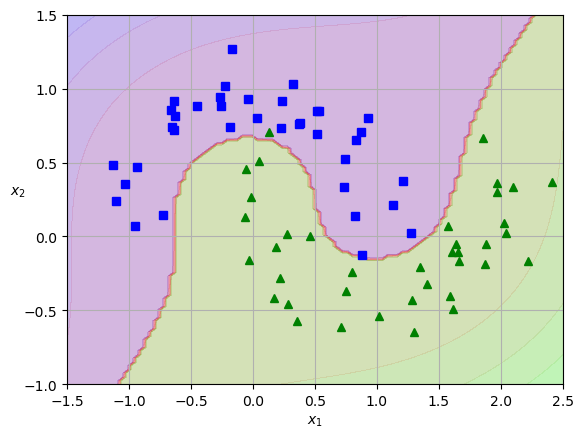

In [34]:
def plt_data(X,y, ax):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(ax)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plt_predictions(clf, ax):
    x0s = np.linspace(ax[0], ax[1], 100)
    x1s = np.linspace(ax[2], ax[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1) # distance of 
    
plt_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plt_data(X_train, y_train, [-1.5, 2.5, -1, 1.5])

As we add more featues, it slows the SVC. Reducing the number of features, gives poor classification.

Therefore **kernel trick** is used. By this method, it creates a non linear classficication just like adding polynomial features without actually adding them

In [4]:
from sklearn.svm import SVC

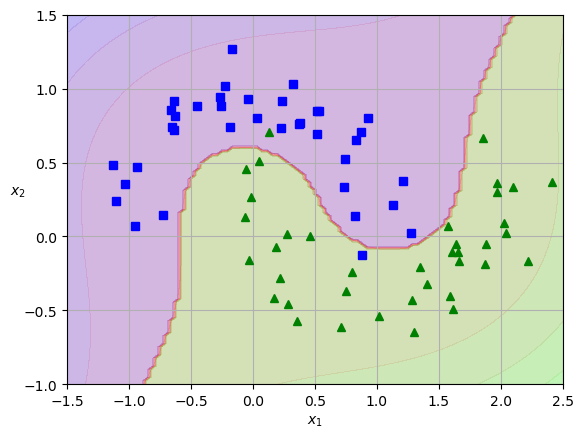

In [38]:
kernal_svm_clf = make_pipeline(StandardScaler(),
                              SVC(kernel="poly", degree=3, coef0=1, C=5))

kernal_svm_clf.fit(X_train,y_train)

plt_predictions(kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plt_data(X_train, y_train, [-1.5, 2.5, -1, 1.5])

Increase the `degree` causes overfitting beyond a ceratin limit. `coef0` controls how much the model is influenced by high degree terms versus low-degree terms

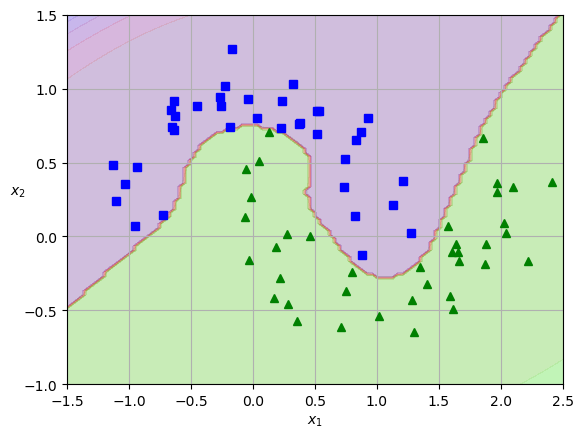

In [47]:
kernal_svm_clf = make_pipeline(StandardScaler(),
                              SVC(kernel="poly", degree=10, coef0=1, C=5)) # equal influence of all featues

kernal_svm_clf.fit(X_train,y_train)

plt_predictions(kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plt_data(X_train, y_train, [-1.5, 2.5, -1, 1.5])

# Linear SVC implementation using Batch Gradient Descent

In [5]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)